In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This opens the upload dialog in Colab




Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (1).csv


In [ ]:
# Load into pandas dataframe
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [ ]:
df.describe()
df.head()
#df.info()


,Age
0,9.0


Let us *feel* our dataset and get an overview on the stats and indicators that we have in our disposal. The dataset we will be working with is **Diabetes Health Indicators Dataset**.


We can also see that in this dataset the age has been categorized or encoded as the highest value for age stands at 13 the median being 8  which is *quite unusual*.

In [ ]:
df['Age'].max()

13.0

In [ ]:
df['Age'].median()

8.0

Our income,education  has also been categorized in a similar manner

In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Separate numerical/categorical
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Impute
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])


# Encode categorical is done normally but however if u checkin this dateaset there is no need to encode column(s) of a dataset as we only have floatdatatype here so we just do imputation only


Categorial encoding is done normally but however if u checkin this dateaset there is no need to encode column(s) of a dataset as we only have floatdatatype here so we just do imputation only.

*Actually imputation isnt needed here as all values are filled but nevertheless for demonstration I have included the procedure. whether or not imputation is needed can be checked using:*

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


**Imputation? Encoding?**

 Imputation is basically a technique to fill empty values in columns using frequently occuring values or the median value of the dataset. It keeps the dataset complete in order for models to function.

Encoding changes strings into numerical format as it is then readable by machine learning algorithms.

In [ ]:
df.shape

(253680, 22)

 gives us no of *rows* and *columns*

Text(0.5, 1.0, 'Target Class Distribution')

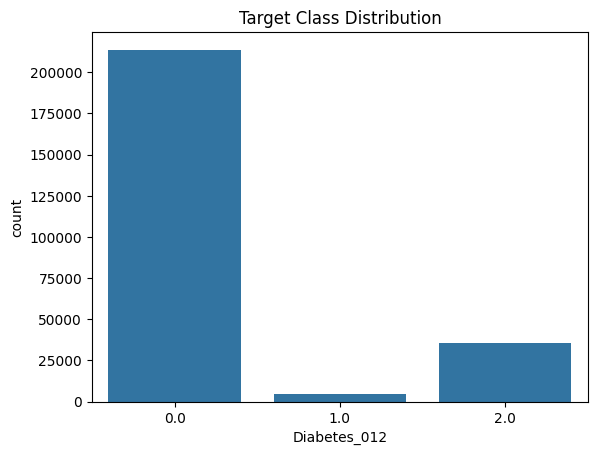

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes_012', data=df)
plt.title("Target Class Distribution")


*What does this chart describe?*

 Well,it is a simple representation of the count of each category of diabetes (0- no diabetes 1- pre diabetes 2-diabetes)

<Axes: xlabel='Diabetes_012', ylabel='Income'>

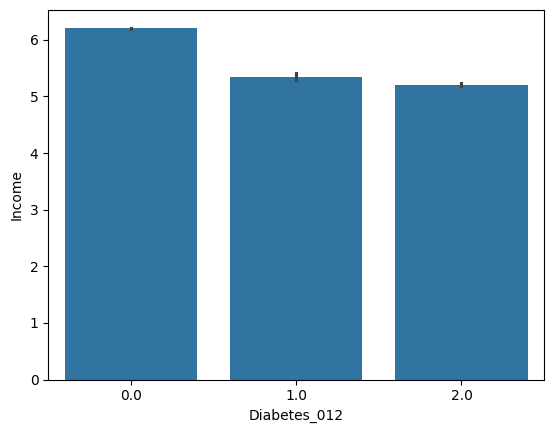

In [ ]:
# Numeric vs target
sns.barplot(x='Diabetes_012', y='Income', data=df)


This bar plot shows that individuals with a diabetes diagnosis (class 2) have lower average income compared to non-diabetic individuals (class 0), indicating a possible negative correlation between income and diabetes prevalence.

In [ ]:
df[['Income', 'Diabetes_012']].corr()

,Income,Diabetes_012
Income,1.000000,-0.171483
Diabetes_012,-0.171483,1.000000


*Thus our intuition is correct, we get a -ve value indicating -ve correlation.*

<Axes: xlabel='Diabetes_012', ylabel='Education'>

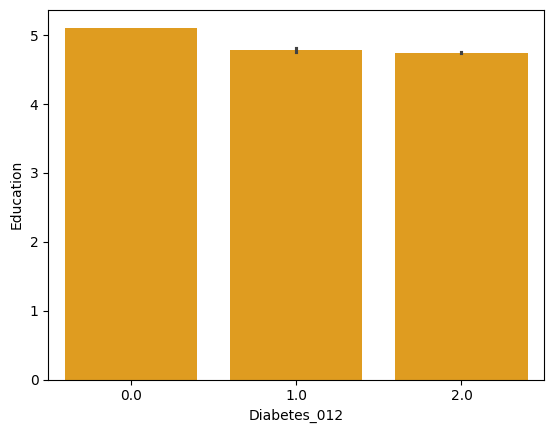

In [ ]:
sns.barplot(x='Diabetes_012', y='Education', data=df,color="orange")

This bar plot shows that individuals with a diabetes diagnosis (class 2) are less educated compared to non-diabetic individuals (class 0), indicating a possible negative correlation between education and diabetes prevalence.

In [ ]:
df[['Education', 'Diabetes_012']].corr()

,Education,Diabetes_012
Education,1.000000,-0.130517
Diabetes_012,-0.130517,1.000000


<Axes: xlabel='Diabetes_012', ylabel='Age'>

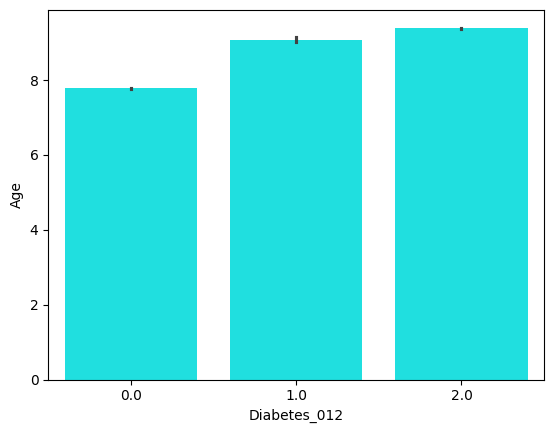

In [ ]:
sns.barplot(x='Diabetes_012', y='Age', data=df,color="cyan")

However here, it is quite the contrary.

This bar plot shows that individuals with a diabetes diagnosis (class 2) are older compared to non-diabetic individuals (class 0), indicating a possible positive correlation between age and diabetes prevalence.
Same holds for class 2 over class 1 and class 1 over class 0.

In [ ]:
df[['Age', 'Diabetes_012']].corr()

,Age,Diabetes_012
Age,1.000000,0.185026
Diabetes_012,0.185026,1.000000


Earlier we have explored charts by categorizing diabetes into 3 : diabetes,prediabetes and no diabates. But now we will be basing on charts on the mean i.e *the mean of diabetes readings taken with possible values being: 0,1,2.*

And we narrow the class to 2 nos: 1. no diabetes 2. prediabetic or diabetic

Text(0.5, 1.0, 'Diabetes Level by High Blood Pressure Status')

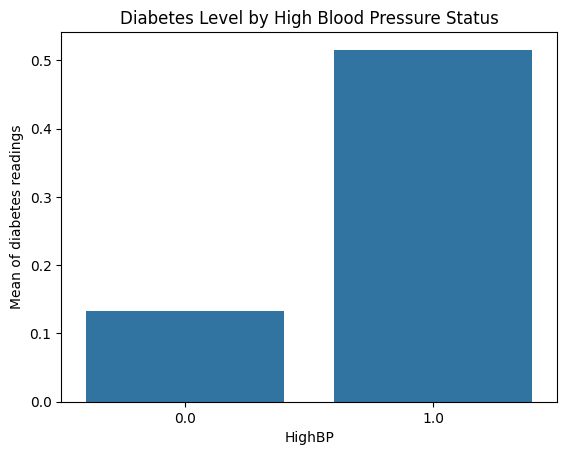

In [ ]:
sns.barplot(x='HighBP', y='Diabetes_012', data=df, ci=None)
plt.ylabel("Mean of diabetes readings")
plt.title('Diabetes Level by High Blood Pressure Status')


We can see the bar for HighBP = 1 is higher, it means that:

This bar plot shows that individuals with a diabetes diagnosis (class 2) have higher BP count compared to non-diabetic individuals (class 0), indicating a possible positive correlation between income and diabetes prevalence.


"People with high blood pressure are more likely to also have diabetes or be pre-diabetic."

This is called comorbidity — when two medical conditions tend to occur together.

In [ ]:
df[['Age', 'Diabetes_012']].corr()

,Age,Diabetes_012
Age,1.000000,0.185026
Diabetes_012,0.185026,1.000000


<Axes: xlabel='Income', ylabel='Diabetes_012'>

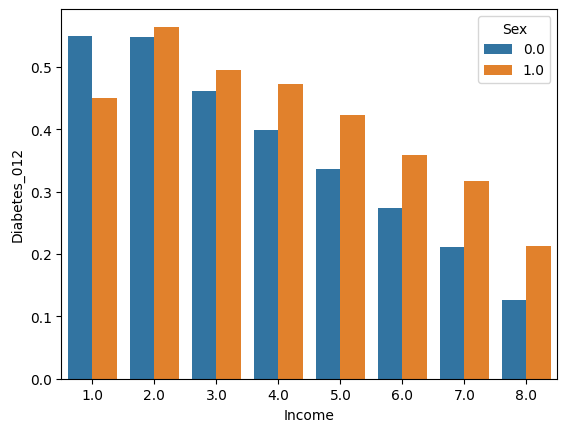

In [ ]:
sns.barplot(x='Income', y='Diabetes_012', hue='Sex', data=df,ci=None)

Here we use the visual storytelling element where we check ..

**Sex v Income v Diabetes**

Income effect on diabetes:

As income increases, average diabetes class tends to decrease (bars get shorter).

This suggests higher income groups have lower diabetes risk.




 *Here 0.0 represents females and 1.0 represents males*

When comparing sexes:

At lower income levels, males (1) tend to have higher average diabetes risk than females (0).

This suggests that low-income males are more vulnerable to diabetes compared to females in the same income bracket.

At higher income levels, the diabetes risk for both sexes is lower and more similar, implying income may help reduce the gap.

Overall, both income and sex influence diabetes risk, with low-income males showing the highest risk in this dataset.

